<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR79f0HtmO_rLX5R89c90X6owsEp6_zRRG7LUjr1ToQFx-R6f6I" style="float: left; margin: 20px; height: 100px">

# Web Scraping Indeed

_Author: Alfred Zou_

---

### Introduction
---
In my opinion, the emergence and sudden popularity of the data field is probably caused by a few factors:

**Data has become easier to collect for companies, due to:**
* the creation and popularity of the internet, which has lead to an explosion of data
* the improvement of software systems to track purchases, customers, etc

**Advancements in computing power and software:**
* improvements in computing power, especially GPUs greatly speed up machine learning
* the creation of cloud platforms, where computing power can be easily obtained without businesses needing to physically set up infrastructure 
* improvements in software has made data analysis and machine learning through python packages such as `pandas`, `scikit-learn` and `TensorFlow` much easier to learn and implement

**Realisation of the importance of data:**
* companies such as Facebook and Google have utilised personal data to serve advertisements
* companies such as Spotify and YouTube have developed data driven recommendation systems

Companys have realised the hidden potential of data that need to be analysed by `data analysts` to help drive decision making or used to make a prediction through a machine learning model created by a `data scientist`. Of course `data engineers` are needed to build the data pipeline for `data analyst` and `data scientists` to use.

### Aim
---
Due to the relatively new nature of the data field, data job positions haven't been concretely defined. Each company will have their own job titles with different and possible misconception of role requirements. For example, a HR person writing a job advertisement may confuse a `data scientist` with a `data analyst`. It is likely that as the profession becomes more mature, more specific date roles are introduced.

I believe that there are four predominate data roles: `data analyst`, `data engineer`, `data scientist` and `business analyst`.

My aim is to determine the most relevant skills requested in job advertisements for each of these four job titles.

### Limitations
---
* This analysis only looks at the Sydney market, generalising outside of the Sydney market will invalidate this model
* This analysis only looks at job postings on Indeed
* This analysis assumes three types of data roles, there maybe more. For example, the position as a data steward
    * Note: performing an unspervised clustering, may determine how many data roles there actually are
* This analysis does not determine the most relevant skills required for each of the three job titles, instead it determines the most releveant skills asked by job advertisements
* There is probably a disconnect between the skills of those in the position and the skills being requested by job advertisements
    * To truly determine the skills of those in the position, collecting data from those in the data field through survey or scraping LinkedIn data, would probably be a more effective mtheod

## Job URL Scrapping
---

Here are the packages I will use:
* `pandas` for DataFrames and `numpy` for maths operations
* `requests.get()` to crawl websites and `Selector().xpath` to parse the html
* `time.sleep()` to implement a delay during scraping to prevent errors
* `time`
* `re` (regex) for filtering and cleaning DataFrame

In [1]:
# Import packages
import pandas as pd
import numpy as np
import requests
from scrapy.selector import Selector
from IPython.display import clear_output
import time
import re

In [2]:
# Iterating over search titles, which means that all words must be in the string for the job title
search_titles = ["data analyst","data analytics","business analyst", "business intelligence", "data scientist","data science","data engineer","database engineer","machine learning"]

In [4]:
'''
Extract all job URLs for each search_title
'''

# Initialise empty list related to search term
job_URL_list = []
search_title_list = []

# Start timer
start = time.time()

# Iterating over search titles, job types and salary ranges..
for stitle in search_titles:

    # Crawl to the first page of the search results
    path = f"https://au.indeed.com/jobs?as_ttl={stitle.replace(' ','+')}&sr=directhire&radius=0&l=Australia&fromage=any&limit=50&sort=&psf=advsrch&from=advancedsearch"
    req = requests.get(path)

    # Extract the URLs for extra pages 
    extra_page_URL_list = Selector(text=req.text).xpath('//div[@class="pagination"]/a/@href').getall()
    extra_page_URL_list = extra_page_URL_list[:-1] # drop the last URL, due to next button URL
    extra_page_URL_list = ['http://au.indeed.com' + i for i in extra_page_URL_list]            

    print(f'Page 1 of {len(extra_page_URL_list)+1}:', end = '\n\n')

    print(f'Searching for all jobs titles that include: {stitle}',end = '\n')

    # Extract all URLs for all the job listings in page 1
    page_job_URL_list = Selector(text=req.text).xpath('//a[@data-tn-element="jobTitle"]/@href').getall()
    print(f"{len(page_job_URL_list)} job URLs extracted from Page 1", end = '\n\n')

    # Append all job URLs
    # Append search titles, job types and salary ranges to match number of job URLs
    job_URL_list += page_job_URL_list
    for i in range(len(page_job_URL_list)):
        search_title_list.append(stitle)

    # To make sure all list lengths are equal
    print('Job URL count:',len(job_URL_list))
    print('Search title count:',len(search_title_list))
    clear_output(wait=True)

    time.sleep(0.1)

    # Iterate through all the additional pages
    page_count = 1
    for extra_page in extra_page_URL_list:
        page_count += 1

        # Crawl to extra page
        req = requests.get(extra_page)
        print(f'Page {page_count} of {len(extra_page_URL_list)+1}:', end = '\n\n')

        print(f'Searching for all jobs titles that include: {stitle}',end = '\n')

        # Extract all URLs for all the job listings in extra pages
        page_job_URL_list = Selector(text=req.text).xpath('//a[@data-tn-element="jobTitle"]/@href').getall()
        print(f"{len(page_job_URL_list)} job URLs extracted from Page {page_count}", end = '\n\n')

        # Append all job URLs
        # Append search titles, job types and salary ranges to match number of job URLs
        job_URL_list += page_job_URL_list
        for i in range(len(page_job_URL_list)):
            search_title_list.append(stitle)

        # To make sure all list lengths are equal
        print('Job URL count:',len(job_URL_list))
        print('Search title count:',len(search_title_list))
        clear_output(wait=True) 

        time.sleep(0.1)
                             
job_URL_list = ['http://au.indeed.com' + i for i in job_URL_list]
print(f"Job URL scraping completed: {len(job_URL_list)}", end = '\n')

end = time.time()

Job URL scraping completed: 449


In [7]:
# Writing to df
search = pd.DataFrame({"search_title": search_title_list,"job_url_search": job_URL_list})
search.head()

,search_title,job_url_search
0,data analyst,http://au.indeed.com/pagead/clk?mo=r&ad=-6NYlb...
1,data analyst,http://au.indeed.com/pagead/clk?mo=r&ad=-6NYlb...
2,data analyst,http://au.indeed.com/rc/clk?jk=5c172b03ffbfed1...
3,data analyst,http://au.indeed.com/rc/clk?jk=e82ccf3d08dce7d...
4,data analyst,http://au.indeed.com/company/Carecone-Technolo...


In [8]:
search.shape

(449, 2)

In [9]:
# Writing to csv
!mkdir Data
search.to_csv('Data\search.csv',index=False)

A subdirectory or file Data already exists.


### Job Scrapping
---

In [12]:
%%time

'''
For each job URL, scrape the job details
'''

# Initialising job detail lists
job_url_result_list = []
job_title_list = []
company_list = []
location_list = []
salary_list = []
job_description_list = []

job_count = 0
for i in job_URL_list:
    job_count += 1

    # Crawl to job URL
    req = requests.get(i)
    print(f'Job {job_count} of {len(job_URL_list)}:', end = '\n\n')
        
    # Extracting job details
    job_title = Selector(text=req.text).xpath('//h3/text()').get()
    company = Selector(text=req.text).xpath('//div[@class="icl-u-lg-mr--sm icl-u-xs-mr--xs"]//text()').get()
    location = Selector(text=req.text).xpath('//span[@class="jobsearch-JobMetadataHeader-iconLabel"]/text()').get()
    salary = Selector(text=req.text).xpath('//div[@class="icl-IconFunctional icl-IconFunctional--salary icl-IconFunctional--md"]/following-sibling::span/text()').get()
    job_description = ' '.join(Selector(text=req.text).xpath('//div[@id="jobDescriptionText"]//text()').getall())
    
    # Appending all job details
    job_url_result_list.append(i)
    job_title_list.append(job_title)
    company_list.append(company)
    location_list.append(location)
    salary_list.append(salary)
    job_description_list.append(job_description)

    print(f"Job Title: {job_title}", end = '\n')
    print(f"Company: {company}", end = '\n')
    print(f"Location: {location}", end = '\n')
    print(f"Salary: {salary}", end = '\n\n')
    print(f"Description:", end = '\n')
    print(f"{job_description}")
    
    clear_output(wait=True)

Wall time: 2min 33s


In [13]:
# Writing to df
results = pd.DataFrame({"job_title": job_title_list,"company": company_list,"location": location_list,"salary": salary_list,"description":job_description_list,"job_url_result":job_url_result_list})
results.head()

,job_title,company,location,salary,description,job_url_result
0,Data Governance Analyst,Genworth,Sydney NSW,None,Summary \nThe Data Governance Analyst is accou...,http://au.indeed.com/pagead/clk?mo=r&ad=-6NYlb...
1,People Systems Data Reporting Analyst,Lion,Sydney NSW,None,We have an exciting opportunity for an experie...,http://au.indeed.com/pagead/clk?mo=r&ad=-6NYlb...
2,Junior Data Analyst/Scientist,International Institute of Data & Analytics,Sydney NSW,None,The International Institute of Data & Analytic...,http://au.indeed.com/rc/clk?jk=5c172b03ffbfed1...
3,Data & Visualisation Analyst,HSBC,Sydney NSW,None,Some careers have more impact than others. \n ...,http://au.indeed.com/rc/clk?jk=e82ccf3d08dce7d...
4,Data Modeler/Data Analyst,Carecone Technologies,Canberra ACT,None,(AUSTRALIAN CITIZENSHIP with BASELINE / NV1 CL...,http://au.indeed.com/company/Carecone-Technolo...


In [14]:
results.shape

(449, 6)

In [15]:
# Sanity check on titles, OK
results.loc[~(results['job_title'].str.contains(r'(Data)|(Analyst)|(Machine)|(Business)')),'job_title'].unique()

C:\Users\draciel\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


array(['BUSINESS ANALYST (DATA)', 'BUSINESS ANALYST',
       'CONFLICTS ANALYST, NEW BUSINESS INTAKE',
       'SENIOR BUSINESS ANALYST CONSULTANT', 'DATA SCIENTIST',
       'RESEARCH FELLOW IN DATA SCIENCE',
       'DATABASE AND SECURITY ENGINEER'], dtype=object)

In [16]:
# Drop non data related jobs
results = results.drop(results.loc[results['job_title'].str.contains('DATABASE AND SECURITY ENGINEER') | results['job_title'].str.contains('CONFLICTS ANALYST')].index)

In [17]:
# Reset index
results = results.reset_index(drop=True)

In [18]:
# Writing to csv
results.to_csv('Data/results.csv',index=False)

## Merging DataFrames
---

In [19]:
search = pd.read_csv('Data/search.csv')
search.head()

,search_title,job_url_search
0,data analyst,http://au.indeed.com/pagead/clk?mo=r&ad=-6NYlb...
1,data analyst,http://au.indeed.com/pagead/clk?mo=r&ad=-6NYlb...
2,data analyst,http://au.indeed.com/rc/clk?jk=5c172b03ffbfed1...
3,data analyst,http://au.indeed.com/rc/clk?jk=e82ccf3d08dce7d...
4,data analyst,http://au.indeed.com/company/Carecone-Technolo...


In [20]:
results.shape

(447, 6)

In [22]:
results = pd.read_csv('Data/results.csv')
results.head()

,job_title,company,location,salary,description,job_url_result
0,Data Governance Analyst,Genworth,Sydney NSW,NaN,Summary \nThe Data Governance Analyst is accou...,http://au.indeed.com/pagead/clk?mo=r&ad=-6NYlb...
1,People Systems Data Reporting Analyst,Lion,Sydney NSW,NaN,We have an exciting opportunity for an experie...,http://au.indeed.com/pagead/clk?mo=r&ad=-6NYlb...
2,Junior Data Analyst/Scientist,International Institute of Data & Analytics,Sydney NSW,NaN,The International Institute of Data & Analytic...,http://au.indeed.com/rc/clk?jk=5c172b03ffbfed1...
3,Data & Visualisation Analyst,HSBC,Sydney NSW,NaN,Some careers have more impact than others. \n ...,http://au.indeed.com/rc/clk?jk=e82ccf3d08dce7d...
4,Data Modeler/Data Analyst,Carecone Technologies,Canberra ACT,NaN,(AUSTRALIAN CITIZENSHIP with BASELINE / NV1 CL...,http://au.indeed.com/company/Carecone-Technolo...


In [23]:
sr = pd.merge(search,results,how='right',left_on='job_url_search',right_on='job_url_result')
sr = sr.drop(columns='job_url_search')
sr = sr.drop_duplicates()
sr.head()

,search_title,job_title,company,location,salary,description,job_url_result
0,data analyst,Data Governance Analyst,Genworth,Sydney NSW,NaN,Summary \nThe Data Governance Analyst is accou...,http://au.indeed.com/pagead/clk?mo=r&ad=-6NYlb...
1,data analyst,People Systems Data Reporting Analyst,Lion,Sydney NSW,NaN,We have an exciting opportunity for an experie...,http://au.indeed.com/pagead/clk?mo=r&ad=-6NYlb...
2,data analyst,Junior Data Analyst/Scientist,International Institute of Data & Analytics,Sydney NSW,NaN,The International Institute of Data & Analytic...,http://au.indeed.com/rc/clk?jk=5c172b03ffbfed1...
3,data scientist,Junior Data Analyst/Scientist,International Institute of Data & Analytics,Sydney NSW,NaN,The International Institute of Data & Analytic...,http://au.indeed.com/rc/clk?jk=5c172b03ffbfed1...
6,data analyst,Data & Visualisation Analyst,HSBC,Sydney NSW,NaN,Some careers have more impact than others. \n ...,http://au.indeed.com/rc/clk?jk=e82ccf3d08dce7d...


In [24]:
sr.shape

(447, 7)

## Cleaning
---

#### Cleaning search_titles
---
I have decided to split the split data roles into 4 main categoroes:
* Data engineer: creates, manages and runs the data pipeline
* Data analyst: analyses data using EDA to find trends and patterns. Visualises and communicates findings to others
* Business Analyst: a data analyst but with a focus on improving business operations
* Data scientist: creates machine learning models

Keep in mind that the data field is still relatively new, so job titles aren't very well defined. 

Every company will have their own expectations and names for these roles.

In [25]:
sr['search_title'].value_counts()

business analyst         198
data engineer             73
data analyst              67
data scientist            32
data analytics            25
business intelligence     19
data science              16
machine learning          10
database engineer          7
Name: search_title, dtype: int64

In [26]:
# Clean for all data engineer
sr.loc[sr['search_title']=='database engineer','search_title'] = 'data engineer'

# Clean for all data analyst
sr.loc[sr['search_title']=='data analytics','search_title'] = 'data analyst'

# Clean for all business analyst
sr.loc[sr['search_title']=='business intelligence','search_title'] = 'business analyst'

# Clean for all data scientist
sr.loc[sr['search_title']=='machine learning','search_title'] = 'data scientist'
sr.loc[sr['search_title']=='data science','search_title'] = 'data scientist'

In [27]:
sr['search_title'].value_counts()

business analyst    217
data analyst         92
data engineer        80
data scientist       58
Name: search_title, dtype: int64

#### Dropping Duplicates
---

In [29]:
sr.shape

(447, 7)

In [30]:
# Only drops around 31
# Probably from the same jobs picked up by multiple search_titles
sr = sr.drop_duplicates()

In [31]:
sr.shape

(438, 7)

#### Removing Nulls
---
We expect nulls in salary, we will deal with that later

In [33]:
sr.isnull().sum()

search_title        0
job_title           0
company             0
location            0
salary            351
description         0
job_url_result      0
dtype: int64

#### Cleaning company
Remove any recruitment companies

In [34]:
sr['company'].unique()

array(['Genworth', 'Lion', 'International Institute of Data & Analytics',
       'HSBC', 'Carecone Technologies', 'Westpac Group', 'FinXL',
       'Veeva Systems', 'Servian',
       'Department of Agriculture & Water Resources',
       'Reprise Media Australia', 'oOh!', 'Orchard',
       'Department of the Premier and Cabinet (DPC)', 'Interactive',
       'Gravity Consulting', 'Canva', 'Ironbark',
       'Power and Water Corporation', 'Atlassian', 'AMP Limited',
       'Matific', 'Latitude Financial Services', 'IT Alliance Australia',
       'Sirius People', 'ANZ Banking Group', 'City of Greater Geelong',
       'EY', 'Government of South Australia', 'Macquarie Group Limited',
       'Activ', 'Queensland Government', 'MyProsperity',
       'Australian Military Bank', 'Optus', 'IE',
       'Australian Mathematical Sciences Institute', 'Fortune Select',
       'AGL Energy', 'Dialog Information Technology', 'Leidos',
       'HUMANISED GROUP', 'Judo Bank', 'Lockheed Martin Australia',
    

In [35]:
recruitment_index = sr[sr['company'].str.contains(r'([Rr]ecruit)')].index
recruitment_index

Int64Index([265, 338, 349, 412, 413], dtype='int64')

In [36]:
recruitment_index = recruitment_index.append(sr[sr['company']=='Sirius People'].index)

In [37]:
len(recruitment_index)

9

In [38]:
sr = sr.drop(recruitment_index)

In [39]:
sr.head()

,search_title,job_title,company,location,salary,description,job_url_result
0,data analyst,Data Governance Analyst,Genworth,Sydney NSW,NaN,Summary \nThe Data Governance Analyst is accou...,http://au.indeed.com/pagead/clk?mo=r&ad=-6NYlb...
1,data analyst,People Systems Data Reporting Analyst,Lion,Sydney NSW,NaN,We have an exciting opportunity for an experie...,http://au.indeed.com/pagead/clk?mo=r&ad=-6NYlb...
2,data analyst,Junior Data Analyst/Scientist,International Institute of Data & Analytics,Sydney NSW,NaN,The International Institute of Data & Analytic...,http://au.indeed.com/rc/clk?jk=5c172b03ffbfed1...
3,data scientist,Junior Data Analyst/Scientist,International Institute of Data & Analytics,Sydney NSW,NaN,The International Institute of Data & Analytic...,http://au.indeed.com/rc/clk?jk=5c172b03ffbfed1...
6,data analyst,Data & Visualisation Analyst,HSBC,Sydney NSW,NaN,Some careers have more impact than others. \n ...,http://au.indeed.com/rc/clk?jk=e82ccf3d08dce7d...


#### Cleaning location
---
Consolidate work locations

In [40]:
sr['location'].unique()

array(['Sydney NSW', 'Canberra ACT', 'Canberra ACT 2601', 'Australia',
       'North Sydney NSW', 'Port Melbourne VIC', 'Canberra ACT 2600',
       'Eight Mile Plains QLD', 'Darwin NT', 'Sydney NSW 2000',
       'Docklands VIC', 'Melbourne VIC', 'Geelong VIC',
       'Adelaide SA 5000', 'Wembley WA', 'Brisbane QLD', 'Hawthorn VIC',
       'Macquarie Park NSW', 'Melbourne VIC 3000', 'Newstead QLD',
       'Newstead QLD 4006', 'Perth WA', 'Melbourne VIC 3001',
       'Sydney Central Business District NSW', 'Parramatta NSW 2150',
       'St Leonards NSW', 'Chatswood NSW', 'Osborne SA',
       'Glenwood NSW 2768', 'Northern Beaches NSW', 'Balmain NSW 2041',
       'Rhodes NSW 2138', 'Tasmania', 'Chermside QLD',
       'North Sydney NSW 2060', 'Parramatta NSW',
       'Melbourne City Centre VIC', 'Queensland', 'Bundoora VIC',
       'South Melbourne VIC 3205', 'Port Macquarie NSW',
       'South Melbourne VIC', 'Eight Mile Plains QLD 4113',
       'Pyrmont NSW 2009', 'Parkes NSW 2870', 'Ade

In [41]:
# Separating NSW into CBD and other
sr.loc[sr['location'].str.contains(r'(NSW 2000)|(Haymarket NSW)|(District NSW)'),'location'] = 'NSW Sydney CBD'
sr.loc[sr['location'].str.contains(r'(NSW)|(New South)') & ~(sr['location'].str.contains(r'NSW Sydney CBD')),'location'] = 'NSW other'
# Separating Vic into CBD and other
sr.loc[sr['location'].str.contains(r'(VIC 3000)|(City Centre VIC)'),'location'] = 'VIC Melbourne CBD'
sr.loc[(sr['location'].str.contains(r'(VIC)|(Victoria)')) & ~(sr['location'].str.contains(r'VIC Melbourne CBD')),'location'] = 'Vic other'
# Keep other small states together
sr.loc[sr['location'].str.contains(r'(QLD)|(Queensland)'),'location'] = 'QLD'
sr.loc[sr['location'].str.contains(r'WA'),'location'] = 'WA'
sr.loc[sr['location'].str.contains(r'(SA)|(South Australia)'),'location'] = 'SA'
sr.loc[sr['location'].str.contains(r'(Darwin)'),'location'] = 'NT'
sr.loc[sr['location'].str.contains(r'ACT'),'location'] = 'ACT Canberra'

In [42]:
sr['location'].unique()

array(['NSW other', 'ACT Canberra', 'Australia', 'Vic other', 'QLD', 'NT',
       'NSW Sydney CBD', 'SA', 'WA', 'VIC Melbourne CBD', 'Tasmania'],
      dtype=object)

In [43]:
sr['location'].value_counts()

NSW other            213
Vic other             83
QLD                   34
ACT Canberra          25
NSW Sydney CBD        25
Australia             17
WA                    13
SA                    12
VIC Melbourne CBD      4
NT                     2
Tasmania               1
Name: location, dtype: int64

#### Cleaning job_titles
---
Lets remove all managers

In [44]:
sr.loc[sr['job_title'].str.contains(r'[Mm]anager'),'job_title'].unique()

array(['Senior Manager, Data & Analytics',
       'Senior Manager - OR&C Data Steward, Operational Risk Analytics',
       'Senior Manager Data & Analytics - 9 month FTC/Secondment',
       'Senior Manager – Data & Analytics',
       'Senior Manager, Data & Analytics - Australia',
       'Data Scientist Manager / Senior Manager, Decision Modelling & Analytics - Melbourne & Sydney',
       'Manager, Data Analytics, Digital Risk Advisory – Melbourne',
       'Senior Manager, Risk Data, Analytics and Reporting Enablement',
       'Business Analyst/Project Manager',
       'Business Analyst & Development Manager',
       'Business Intelligence Manager',
       'Data Center Construction Cost Engineer Program Manager'],
      dtype=object)

In [45]:
sr = sr.drop(sr.loc[sr['job_title'].str.contains(r'[Mm]anager')].index)

In [46]:
sr.shape

(416, 7)

#### Saving
---

In [47]:
cleaned = sr.reset_index(drop=True)

In [48]:
cleaned.to_csv('Data/cleaned.csv',index=False)

## Q1 Predicting Salary model 1: Linear Regression
---
Method:
1. The target is the salary
2. Train test split
3. Vectorise job_title and description
4. pd.getdummies for categorical variables 
5. CV

In [2]:
sr = pd.read_csv('Data/cleaned.csv')

In [3]:
sr.head()

,search_title,job_title,company,location,salary,description,job_url_result
0,data analyst,Data Governance Analyst,Genworth,NSW other,NaN,Summary \nThe Data Governance Analyst is accou...,http://au.indeed.com/pagead/clk?mo=r&ad=-6NYlb...
1,data analyst,People Systems Data Reporting Analyst,Lion,NSW other,NaN,We have an exciting opportunity for an experie...,http://au.indeed.com/pagead/clk?mo=r&ad=-6NYlb...
2,data analyst,Junior Data Analyst/Scientist,International Institute of Data & Analytics,NSW other,NaN,The International Institute of Data & Analytic...,http://au.indeed.com/rc/clk?jk=5c172b03ffbfed1...
3,data scientist,Junior Data Analyst/Scientist,International Institute of Data & Analytics,NSW other,NaN,The International Institute of Data & Analytic...,http://au.indeed.com/rc/clk?jk=5c172b03ffbfed1...
4,data analyst,Data & Visualisation Analyst,HSBC,NSW other,NaN,Some careers have more impact than others. \n ...,http://au.indeed.com/rc/clk?jk=e82ccf3d08dce7d...


### Test Train Split
---
Keep test and train separate, so we don't get influenced by the test set

In [4]:
y = sr['job_title']
X = sr[['description']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,random_state=400)

In [5]:
print(X_train.shape,X_test.shape)

(332, 1) (84, 1)


In [6]:
# Reset index for easier feature engineering
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

In [7]:
X_train.head()

,description
0,Company Description \n \nWho we are \nAt Leido...
1,- 00007P13 \n \nNSW Electoral Commission \n Th...
2,Bachelor's or Master’s degree in Reliability E...
3,As a Business Analyst you will work with the g...
4,Salary packaging - to suit your personal and f...


### Feature Engineering
---

#### pd.getdummies()
---

#### Vectorising Description
---

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=.1,max_df=.95,stop_words='english',ngram_range=(1,2))
cv_description_train = cv.fit_transform(X_train['description']).todense()
cv_description_train = pd.DataFrame(cv_description_train,columns=cv.get_feature_names())
cv_description_train

,00,000,12,2020,ability,ability work,able,access,achieve,activities,...,workforce,working,workplace,world,writing,written,www,year,years,years experience
0,0,0,3,0,1,0,2,1,0,2,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,2,0,0,0,0,1,1,...,3,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,3,0,0,1,...,0,1,0,0,0,1,0,0,2,0
3,0,1,0,0,0,0,0,1,2,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,1,0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
328,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
329,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
330,0,2,2,0,0,0,0,2,0,0,...,0,0,0,4,0,0,0,0,1,0


In [43]:
# transforming for test set
cv_description_test = cv.transform(X_test['description']).toarray()
cv_description_test = pd.DataFrame(cv_description_test,columns=['description_'+i for i in cv.get_feature_names()])

In [44]:
print(X_train.shape,X_test.shape)

(332, 1) (84, 1)


## Predicting job titles model: Logistic Regression 
---
Method:
1. The target is the search_title
2. Train test split
3. Vectorise job_title and description
4. pd.getdummies for categorical variables 
5. CV

In [45]:
sr.head()

,search_title,job_title,company,location,salary,description,job_url_result
0,data analyst,Data Governance Analyst,Genworth,NSW other,NaN,Summary \nThe Data Governance Analyst is accou...,http://au.indeed.com/pagead/clk?mo=r&ad=-6NYlb...
1,data analyst,People Systems Data Reporting Analyst,Lion,NSW other,NaN,We have an exciting opportunity for an experie...,http://au.indeed.com/pagead/clk?mo=r&ad=-6NYlb...
2,data analyst,Junior Data Analyst/Scientist,International Institute of Data & Analytics,NSW other,NaN,The International Institute of Data & Analytic...,http://au.indeed.com/rc/clk?jk=5c172b03ffbfed1...
3,data scientist,Junior Data Analyst/Scientist,International Institute of Data & Analytics,NSW other,NaN,The International Institute of Data & Analytic...,http://au.indeed.com/rc/clk?jk=5c172b03ffbfed1...
4,data analyst,Data & Visualisation Analyst,HSBC,NSW other,NaN,Some careers have more impact than others. \n ...,http://au.indeed.com/rc/clk?jk=e82ccf3d08dce7d...


In [46]:
y_lr_train = sr.loc[y_train.index,'search_title']
y_lr_test = sr.loc[y_test.index,'search_title']

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logr = LogisticRegression(max_iter=5000)
scores = cross_val_score(logr, cv_description_train, y_lr_train, cv=5, n_jobs=-1)
print(scores)
print(np.mean(scores),np.std(scores))

[0.73134328 0.68656716 0.83333333 0.77272727 0.87878788]
0.7805517865219358 0.06892318988862163


In [48]:
sr['search_title'].value_counts()

business analyst    204
data analyst         81
data engineer        77
data scientist       54
Name: search_title, dtype: int64

In [49]:
# Baseline
sr['search_title'].value_counts()[0]/len(sr['search_title'])

0.49038461538461536

In [50]:
# Accuracy on test set
logr.fit(cv_description_train,y_lr_train)
print(logr.score(cv_description_train, y_lr_train))
print(logr.score(cv_description_test,y_lr_test))

0.9728915662650602
0.8095238095238095


In [51]:
# Using the features find out the weight strength
logr_coefs = pd.DataFrame(logr.coef_,columns=cv_description_train.columns,index=['business analyst','data analyst','data engineer','data scientist']).T
logr_coefs = logr_coefs.reset_index().rename(columns={'index':'features'})
logr_coefs.head()

,features,business analyst,data analyst,data engineer,data scientist
0,00,-0.048341,0.073366,0.006808,-0.031833
1,000,0.017498,-0.041137,-0.076036,0.099674
2,12,0.031608,-0.131745,-0.007806,0.107944
3,2020,-0.196014,0.223402,-0.108475,0.081087
4,ability,-0.100294,-0.060249,0.037967,0.122576


In [52]:
# Create an absolute value column for each label
for i in logr_coefs.columns[1:]:
    logr_coefs['abs ' + i] = logr_coefs[i].apply(np.abs)

In [53]:
# Save results
logr_coefs.to_csv('Data/logr_coefs.csv',index=False)

In [54]:
# Load results
logr_coefs = pd.read_csv('Data/logr_coefs.csv')
logr_coefs.head()

,features,business analyst,data analyst,data engineer,data scientist,abs business analyst,abs data analyst,abs data engineer,abs data scientist
0,00,-0.048341,0.073366,0.006808,-0.031833,0.048341,0.073366,0.006808,0.031833
1,000,0.017498,-0.041137,-0.076036,0.099674,0.017498,0.041137,0.076036,0.099674
2,12,0.031608,-0.131745,-0.007806,0.107944,0.031608,0.131745,0.007806,0.107944
3,2020,-0.196014,0.223402,-0.108475,0.081087,0.196014,0.223402,0.108475,0.081087
4,ability,-0.100294,-0.060249,0.037967,0.122576,0.100294,0.060249,0.037967,0.122576


### Results

In [128]:
logr_coefs.filter(regex='(business)|(features)').sort_values('abs business analyst', ascending=False).head(20)

,features,business analyst,abs business analyst
55,business,0.704219,0.704219
119,data,-0.413316,0.413316
404,report,0.402700,0.402700
57,business analyst,0.311269,0.311269
393,python,-0.307629,0.307629
422,science,-0.275899,0.275899
143,develop,-0.267714,0.267714
20,analytics,-0.264948,0.264948
43,based,0.264631,0.264631
519,years,0.235862,0.235862


In [131]:
logr_coefs.filter(regex='(data analyst)|(features)').sort_values('abs data analyst', ascending=False).head(20)

,features,data analyst,abs data analyst
174,engineer,-0.343180,0.343180
20,analytics,0.340763,0.340763
17,analyst,0.332528,0.332528
144,developing,-0.311792,0.311792
482,time,-0.306818,0.306818
120,data analysis,0.288975,0.288975
288,life,0.277877,0.277877
464,support,-0.271268,0.271268
47,best,0.255016,0.255016
473,techniques,-0.250985,0.250985


In [132]:
logr_coefs.filter(regex='(data engineer)|(features)').sort_values('abs data engineer', ascending=False).head(20)

,features,data engineer,abs data engineer
174,engineer,0.509507,0.509507
55,business,-0.371315,0.371315
122,data engineer,0.334886,0.334886
77,cloud,0.330945,0.330945
175,engineering,0.318435,0.318435
356,performance,0.298111,0.298111
328,new,0.273297,0.273297
255,industry,0.261057,0.261057
38,aws,0.247392,0.247392
20,analytics,-0.230312,0.230312


In [133]:
logr_coefs.filter(regex='(data scientist)|(features)').sort_values('abs data scientist', ascending=False).head(20)

,features,data scientist,abs data scientist
422,science,0.503483,0.503483
123,data science,0.397042,0.397042
473,techniques,0.361256,0.361256
393,python,0.335552,0.335552
482,time,0.309740,0.309740
144,developing,0.302114,0.302114
296,machine learning,0.285564,0.285564
317,model,0.283157,0.283157
295,machine,0.277640,0.277640
319,models,0.250867,0.250867


In [320]:
# Definning a plotter to visualise description weights on predicting job title

def plotter(title):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Plotting the most influential features
    df =logr_coefs.filter(regex=f'({title})|(features)').sort_values(f'{title}', ascending=False)
    df =pd.concat([df.head(15),df.tail(15)])

    fig,ax = plt.subplots(1,1,figsize=(8,10))
    sns.barplot(data=df,y= 'features',x = f'{title}')
    ax.set_xlabel("Coefficients",fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='both', which='minor', labelsize=18)
    ax.set_title(f'{title} skillset', size=30)
    ax.set_ylabel("Features",fontsize=20)

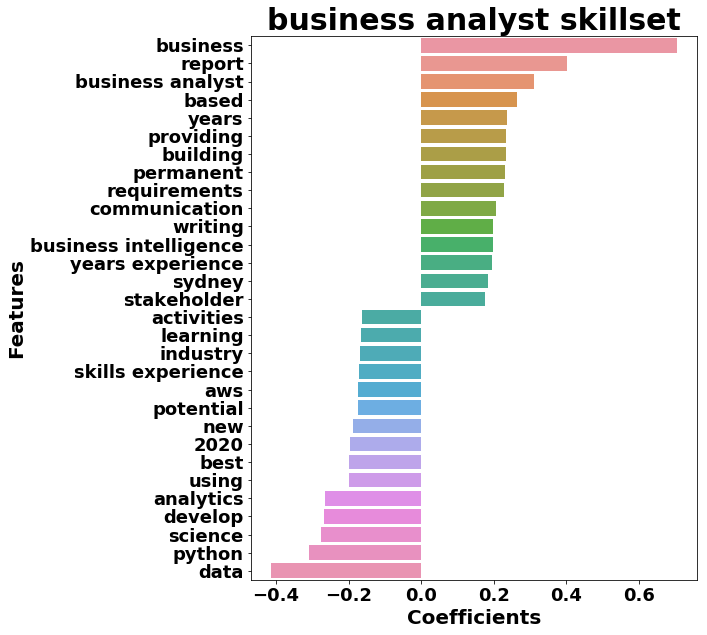

In [321]:
plotter('business analyst')

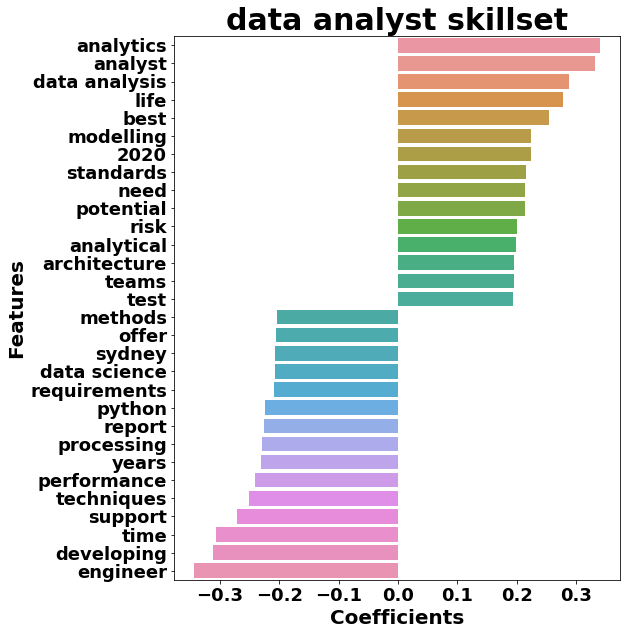

In [322]:
plotter('data analyst')

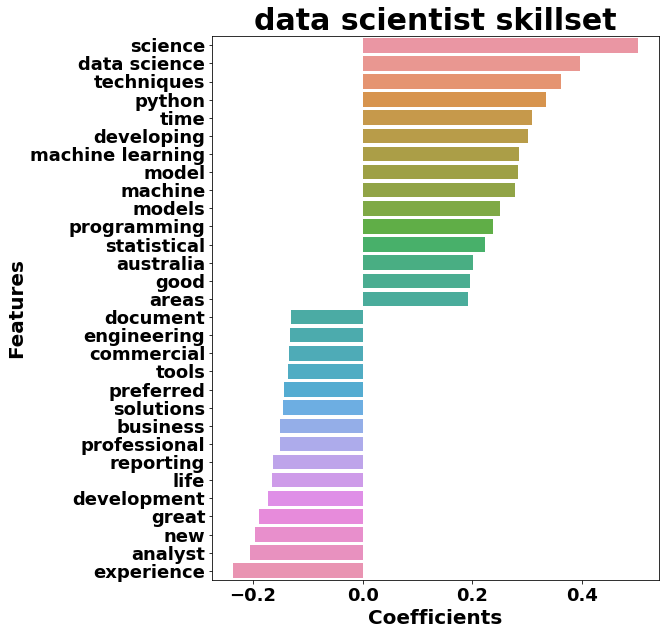

In [323]:
plotter('data scientist')

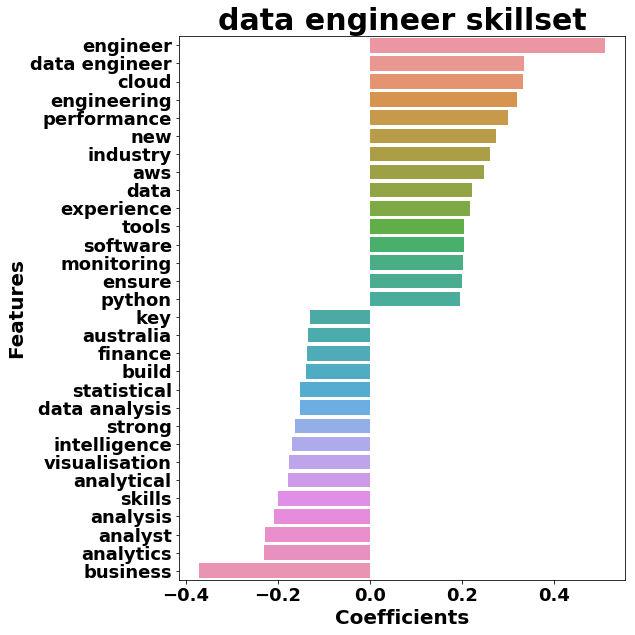

In [324]:
plotter('data engineer')

In [310]:
# Manually selecting the key features

features_list = ['tableau','cloud','aws','python','databases','visualisation','machine learning','sql','azure','reports','insights','big data','spss','sas','google','hadoop',
                'spark']
exact_feature = ['r','excel']
features_df = pd.DataFrame(columns=logr_coefs.columns)
for feature in features_list:
    foo = logr_coefs[logr_coefs['features'].str.contains(feature)]
    features_df = pd.concat([features_df,foo],axis=0)
for feature in exact_feature:
    foo = logr_coefs[logr_coefs['features']== feature]
    features_df = pd.concat([features_df,foo],axis=0)
features_df

,features,business analyst,data analyst,data engineer,data scientist,abs business analyst,abs data analyst,abs data engineer,abs data scientist
468,tableau,0.139669,-0.118133,0.010427,-0.031963,0.139669,0.118133,0.010427,0.031963
77,cloud,-0.120313,-0.136143,0.330945,-0.074488,0.120313,0.136143,0.330945,0.074488
38,aws,-0.172835,-0.136384,0.247392,0.061827,0.172835,0.136384,0.247392,0.061827
393,python,-0.307629,-0.223665,0.195741,0.335552,0.307629,0.223665,0.195741,0.335552
125,databases,-0.111082,-0.069308,0.195479,-0.015089,0.111082,0.069308,0.195479,0.015089
503,visualisation,0.044119,0.100391,-0.175823,0.031313,0.044119,0.100391,0.175823,0.031313
296,machine learning,-0.136527,-0.116462,-0.032574,0.285564,0.136527,0.116462,0.032574,0.285564
448,sql,0.032422,-0.010471,0.040174,-0.062125,0.032422,0.010471,0.040174,0.062125
39,azure,-0.048481,0.001003,0.026713,0.020765,0.048481,0.001003,0.026713,0.020765
406,reports,0.021012,0.163240,-0.109274,-0.074978,0.021012,0.163240,0.109274,0.074978


In [315]:
# Definning a plotter to visualise description weights on predicting job title

def plotter_sorted(title):
    import matplotlib.pyplot as plt
    import seaborn as sns

    df = features_df.sort_values(f'{title}',ascending=False)

    fig,ax = plt.subplots(1,1,figsize=(8,10))
    sns.barplot(data=df,y= 'features',x = f'{title}')
    ax.set_xlabel("Coefficients",fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='both', which='minor', labelsize=18)
    ax.set_title(f'{title} skillset', size=30)
    ax.set_ylabel("Features",fontsize=20)

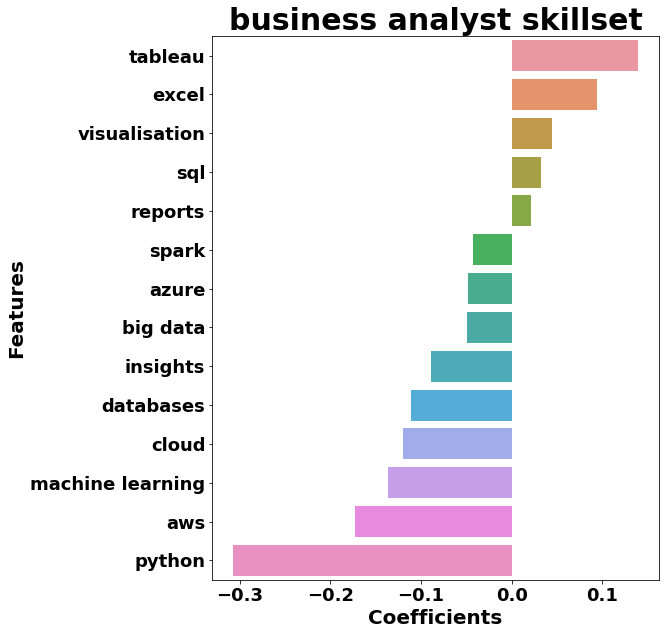

In [316]:
plotter_sorted('business analyst')

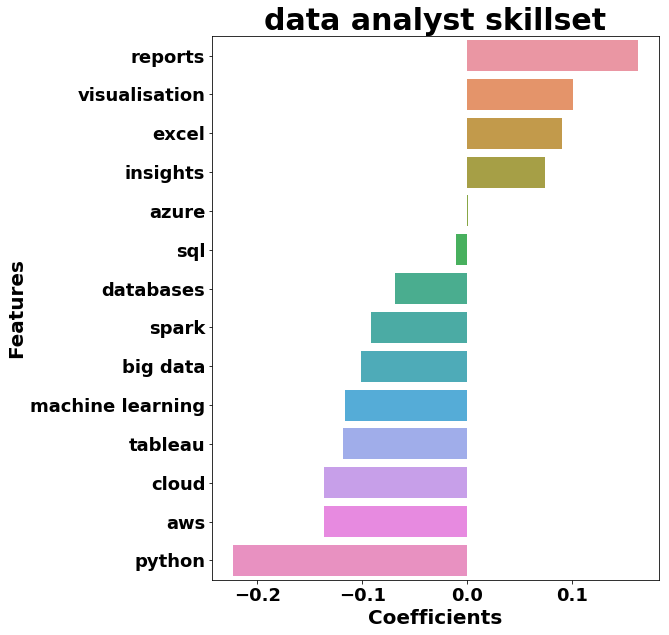

In [317]:
plotter_sorted('data analyst')

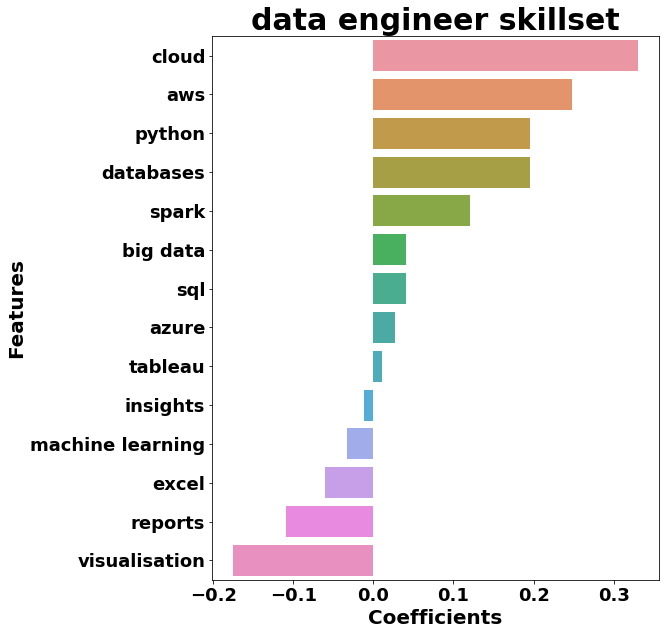

In [318]:
plotter_sorted('data engineer')

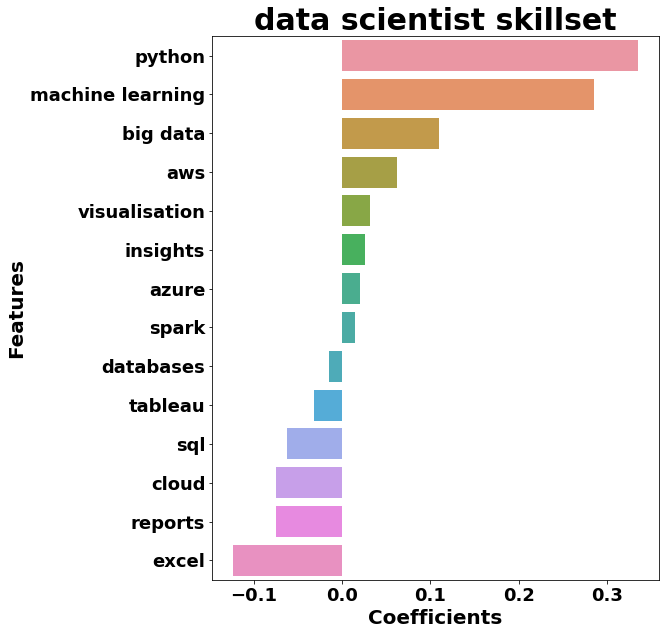

In [319]:
plotter_sorted('data scientist')